In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 1. 一维傅里叶变换

$$
F(u) = \sum_{x=0}^{M - 1} f(x) e^{-i2\pi ux/M}
= \sum_{x=0}^{M - 1} f(x) {\rm cos} \frac{-2\pi ux}{M} + j\sum_{x=0}^{M - 1} f(x) {\rm sin} \frac{-2\pi ux}{M},\quad u=0,1,\cdots, M - 1 \tag{8}
$$
相应的反变换为
$$
f(x) = \frac{1}{M}\sum_{u=0}^{M - 1} F(u) e^{i2\pi ux/M}
=  \frac{1}{M}\sum_{u=0}^{M - 1} F(u) {\rm cos} \frac{2\pi ux}{M} + j\frac{1}{M}\sum_{u=0}^{M - 1} F(u) {\rm sin} \frac{2\pi ux}{M},\quad x=0,1,\cdots, M - 1 \tag{9}
$$

- 取100个方波信号离散点 𝑓(𝑥)；
- 进行傅里叶正变换，得到 𝐹(𝑢)；
- 进行傅里叶反变换，重新得到 𝑓(𝑥)，取前面𝑚项相加，得出恢复后的信号。


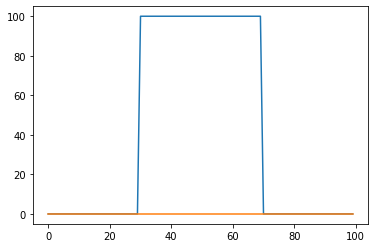

In [3]:
M  = 100
fx = np.zeros(M)
fx[30:70] = 1

# 正变换
Fu = np.zeros(M, np.complex128)
xx = np.arange(0, M)
for u in range(M):
    Re = np.sum(fx * np.cos(-2 * np.pi * u * xx / M))
    Im = np.sum(fx * np.sin(-2 * np.pi * u * xx / M))
    Fu[u] = Re + 1j * Im
    
# 反变换
fx2 = np.zeros(M, np.complex128)
uu  = np.arange(M)
for x in range(M):
    Re = np.sum(Fu * np.cos(2 * np.pi * uu * x / M))
    Im = np.sum(Fu * np.sin(2 * np.pi * uu * x / M))
    fx2[x] = Re + 1j * Im

plt.plot(np.real(fx2))
plt.plot(np.imag(fx2))
plt.show()

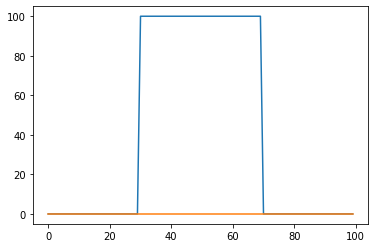

In [4]:
M  = 100
fx = np.zeros(M)
fx[30:70] = 1

# 正变换
Fu = np.zeros(M, np.complex128)
xx = np.arange(0, M)
for u in range(M):
    Fu[u] = np.sum(fx * np.exp(-2j * np.pi * u * xx / M))
    
# 反变换
fx2 = np.zeros(M, np.complex128)
uu  = np.arange(M)
for x in range(M):
    fx2[x] = np.sum(Fu * np.exp(2j * np.pi * uu * x / M))

plt.plot(np.real(fx2))
plt.plot(np.imag(fx2))
plt.show()

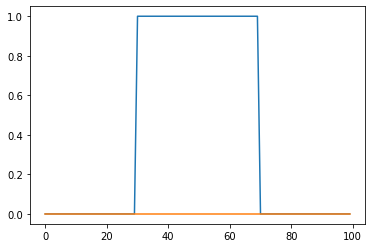

In [5]:
M  = 100
fx = np.zeros(M)
fx[30:70] = 1

Fu = np.fft.fft(fx)
fx2 = np.fft.ifft(Fu)

plt.plot(np.real(fx2))
plt.plot(np.imag(fx2))
plt.show()

## 2. 二维离散傅里叶变换

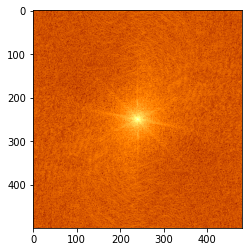

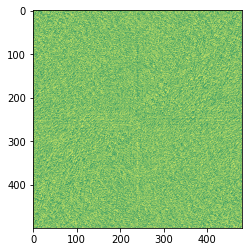

In [27]:
I = cv.imread('pic/cat500x480.jpg', 0)
F = np.fft.fft2(I)
Fshift = np.fft.fftshift(F)
Amp = np.abs(Fshift)
Ang = np.angle(Fshift)

plt.imshow(np.log(Amp + 1), cmap='afmhot')
plt.show()

plt.imshow(Ang, cmap='summer')
plt.show()

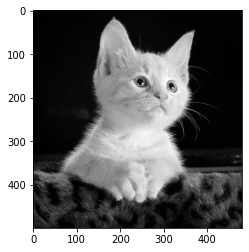

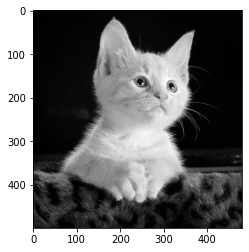

In [29]:
I1 = np.fft.ifft2(F)
I2 = np.fft.ifft2(Fshift)


show(np.abs(I1))
show(np.abs(I2))

## 2.2 图像融合

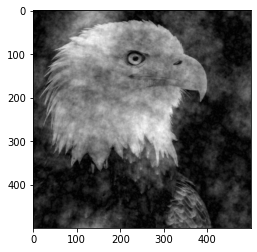

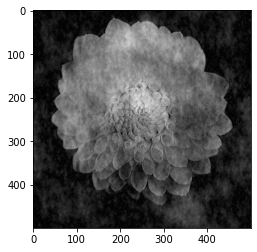

In [31]:
A = cv.imread('pic/flower500x500.jpg', 0)
B = cv.imread('pic/eagle500x500.jpg', 0)

FA = np.fft.fft2(A)
FB = np.fft.fft2(B)

FA_Amp, FA_Ang = np.abs(FA), np.angle(FA)
FB_Amp, FB_Ang = np.abs(FB), np.angle(FB)

F1 = FA_Amp * np.cos(FB_Ang) + 1j * FA_Amp * np.sin(FB_Ang)
F2 = FB_Amp * np.cos(FA_Ang) + 1j * FB_Amp * np.sin(FA_Ang)

I1 = np.fft.ifft2(F1)
I2 = np.fft.ifft2(F2)

show(np.abs(I1))
show(np.abs(I2))

## 3. Butterworth滤波

In [46]:
def get_low_pass_filter(N, M, D0, n):
    xx, yy = np.meshgrid(np.arange(M)-M//2, np.arange(N)-N//2)
    D = np.sqrt(xx**2 + yy**2)
    H = 1 / (1 + (D / D0)**(2*n))
    return H

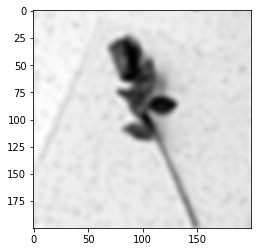

In [51]:
I = cv.imread('pic/rose_spnoise_200x200.jpg', 0)
N, M = I.shape

F  = np.fft.fft2(I)
D0 = 20
n  = 3
H  = get_low_pass_filter(N, M, D0, n)
Fs = np.fft.fftshift(F)
HF = H * Fs
I2 = np.fft.ifft2(HF)
I2 = np.abs(I2)

show(I2)

### 3.2 Butterworth高通滤波

In [52]:
def get_high_pass_filter(N, M, D0, n):
    xx, yy = np.meshgrid(np.arange(M)-M//2, np.arange(N)-N//2)
    D = np.sqrt(xx**2 + yy**2)
    H = 1 / (1 + (D0 / D)**(2*n))
    return H

<ipython-input-52-467f08fa4228>:4: RuntimeWarning: divide by zero encountered in true_divide
  H = 1 / (1 + (D0 / D)**(2*n))


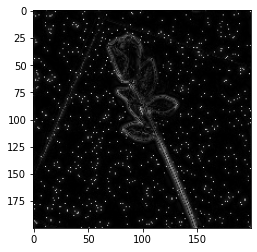

In [53]:
I = cv.imread('pic/rose_spnoise_200x200.jpg', 0)
N, M = I.shape

F  = np.fft.fft2(I)
D0 = 20
n  = 3
H  = get_high_pass_filter(N, M, D0, n)
Fs = np.fft.fftshift(F)
HF = H * Fs
I2 = np.fft.ifft2(HF)
I2 = np.abs(I2)

show(I2)